# Socio-economic analysis via data visualization

## 1. Import packages and data

In [2]:
# import plotly figures and express
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# data gapminder data
data = px.data.gapminder()
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [5]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


## 2. F/I/CH life expectancy charts

### 2.1 LifeExp standard bar chart

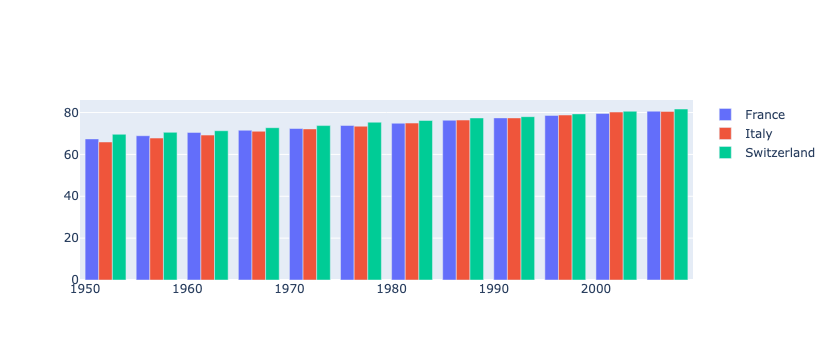

In [9]:
# split data per selected countries
df_fr = data[data['country']=='France']
df_it = data[data['country']=='Italy']
df_ch = data[data['country']=='Switzerland']

# create figure plot
fig = go.Figure(
    data=[
        # different go.Bar for each trace
        go.Bar(name="France", x=df_fr['year'], y=df_fr['lifeExp']),
        go.Bar(name="Italy", x=df_it['year'], y=df_it['lifeExp']),
        go.Bar(name="Switzerland", x=df_ch['year'], y=df_ch['lifeExp'])
    ]
)
fig.show()

### 2.2 Improved lifeExp bar chart

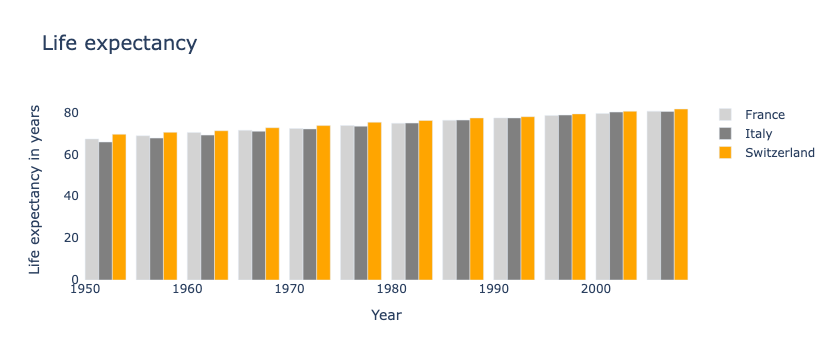

In [24]:
# highlight Switzerland over other countries

# from previous chart
df_fr = data[data['country']=='France']
df_it = data[data['country']=='Italy']
df_ch = data[data['country']=='Switzerland']

fig = go.Figure(
    data=[
        # marker to change properties
        go.Bar(name="France", x=df_fr['year'], y=df_fr['lifeExp'], marker={"color": "lightgray"}),
        go.Bar(name="Italy", x=df_it['year'], y=df_it['lifeExp'], marker_color="gray"),
        go.Bar(name="Switzerland", x=df_ch['year'], y=df_ch['lifeExp'], marker_color="orange")
    ],
    # define improved chart layout
    layout=dict(
        title={"text": "Life expectancy", "font": {"size": 20}},
        plot_bgcolor="white",
        xaxis={
            "title": {"font": {"size": 14}, "text": "Year"},
        },
        yaxis={
            "title": {"font": {"size": 14}, "text": "Life expectancy in years"}
        }
    )
)
fig.show()

### 2.3 LifeExp in 2007 / GDP per capita over time subplots visualization

In [25]:
# make_subplots from plotly
from plotly.subplots import make_subplots

In [27]:
# recheck df format
data.head(1)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4


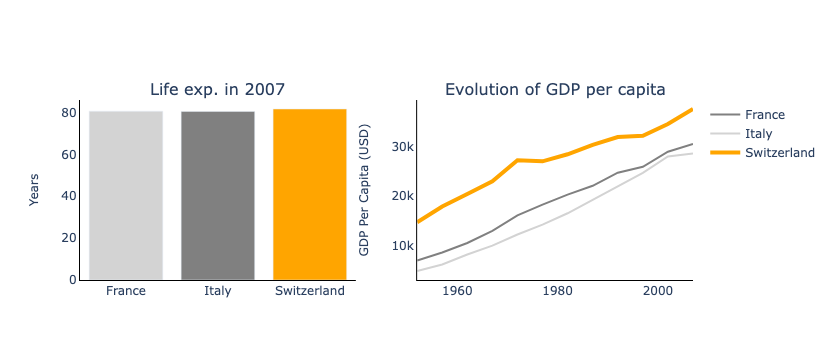

In [44]:
# compare life expectancy for F, I, CH in 2007
# display GDP per capita over time for F, I, CH

# define dataset
lifeExp = data[(data['country'].isin(['France', 'Italy', 'Switzerland'])) & (data['year']==2007)]

# figure with 2 subplots and title
fig1 = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Life exp. in 2007", "Evolution of GDP per capita")
)

# first plot data trace
fig1.add_trace(
    go.Bar(x=lifeExp['country'], y=lifeExp['lifeExp'], marker_color=["lightgray", "gray", "orange"],
           # define what is shown while hovering
           hovertemplate="Country: %{x}<br>Life expectancy: %{y:.1f}", showlegend=False )
    ,row=1, col=1
)

# second plot data traces
# France
fig1.add_trace(
    go.Scatter(x=df_fr['year'], y=df_fr['gdpPercap'], name="France",
               marker={"color": "gray"},
               mode="lines"
              )
    ,row=1, col=2
)
# Italy
fig1.add_trace(
    go.Scatter(x=df_it['year'], y=df_it['gdpPercap'], name="Italy",
               marker={"color": "lightgray"},
               mode="lines"
              ),
    row=1, col=2
)
# Switzerland
fig1.add_trace(
    go.Scatter(x=df_ch['year'], y=df_ch['gdpPercap'], name="Switzerland",
               line={"color": "orange", "width": 4},
               mode="lines"
              ),
    row=1, col=2
)

# update layout
fig1.update_layout(
    plot_bgcolor="white",
    # shows all hover labels for all traces at once
    hovermode="x"
)

# show x-line for both axes, show y-axis labels for each subplot
fig1.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig1.update_yaxes(showline=True, linewidth=1, linecolor="black")
fig1.update_yaxes(title={"text": "Years", "font": {"size": 12}}, row=1, col=1)
fig1.update_yaxes(title={"text": "GDP Per Capita (USD)", "font": {"size": 12}}, row=1, col=2)

# show figure
fig1.show()

## 3. Boxplot lifeExp per continent in 2007

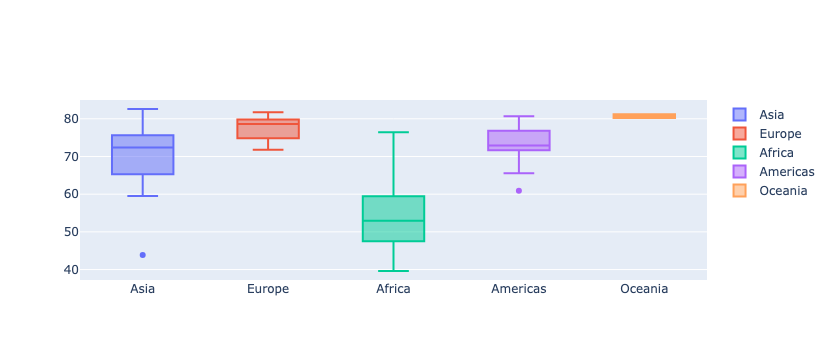

In [50]:
# life expectancy distribution per continent in 2007

# array of unique continents
continents = data['continent'].unique()

# create figure
fig = go.Figure()

# for each continent
for continent in continents:
    # regroup by continent and show lifeExp in 2007
    y = data[(data['continent'] == continent) & (data['year'] == 2007)]['lifeExp']
    # trace boxplot
    fig.add_trace(go.Box(y=y, name=continent))

# show figure
fig.show()

## 4. GDP per capita vs lifeExp scatter